In [1]:
%matplotlib inline

import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord

Let's start by loading a local MOC and plotting it

In [2]:
from mocpy import MOC
m1 = MOC.from_fits('demo-data/P-SDSS9-r.fits')

Now, we load MOC for GALEX GR6 AIS FUV:

In [3]:
m2 = MOC.from_fits('demo-data/P-GALEXGR6-AIS-FUV.fits')

In [4]:
m3 = m1.union(m2)

CPU times: user 1.97 s, sys: 95.4 ms, total: 2.07 s
Wall time: 2.34 s


CPU times: user 602 ms, sys: 67.5 ms, total: 670 ms
Wall time: 861 ms


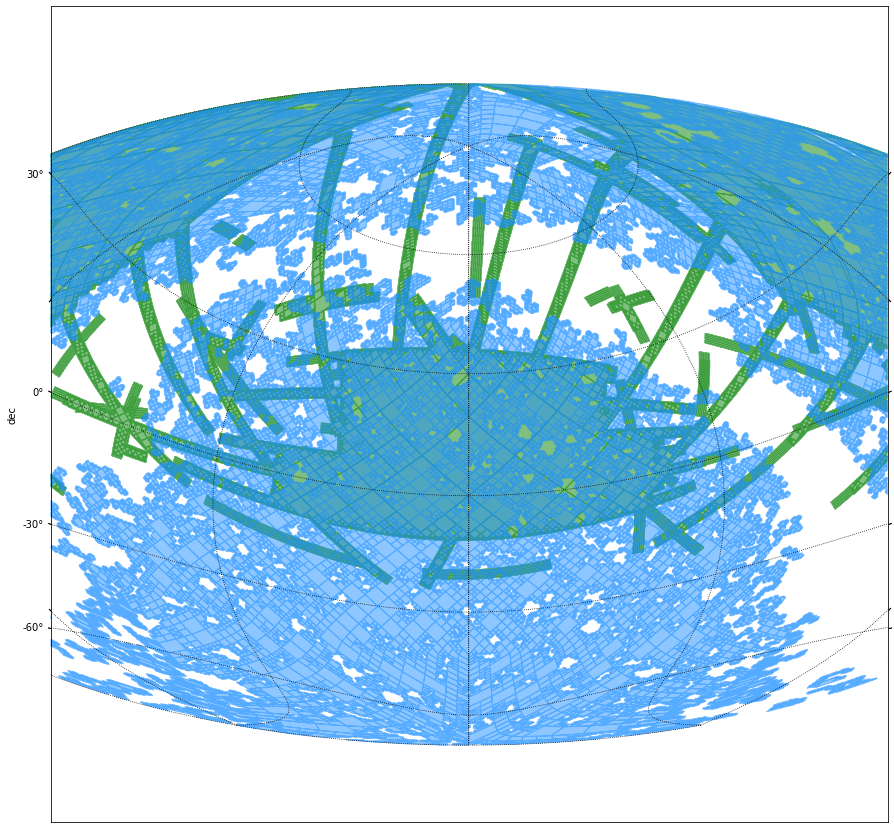

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(111, figsize=(15, 15))

from mocpy import WCS

from astropy.coordinates import Angle
with WCS(fig, 
         fov=200 * u.deg,
         center=SkyCoord(0, 20, unit='deg', frame='icrs'),
         coordsys="icrs",
         rotation=Angle(0, u.degree),
         projection="AIT") as wcs:
    ax = fig.add_subplot(1, 1, 1, projection=wcs)

    %time m1.fill(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="green")
    %time m2.fill(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="dodgerblue")

plt.xlabel('ra')
plt.ylabel('dec')
plt.grid(color="black", linestyle="dotted")

We can compute the intersection between the 2 MOC:

CPU times: user 1.21 s, sys: 80.5 ms, total: 1.3 s
Wall time: 1.47 s


/home/baumann/.local/lib/python3.6/site-packages/astropy_healpix/core.py:592: RuntimeWarning: invalid value encountered in neighbours_nested
  return np.stack(func(healpix_index, nside))


CPU times: user 4.25 s, sys: 467 ms, total: 4.72 s
Wall time: 4.72 s


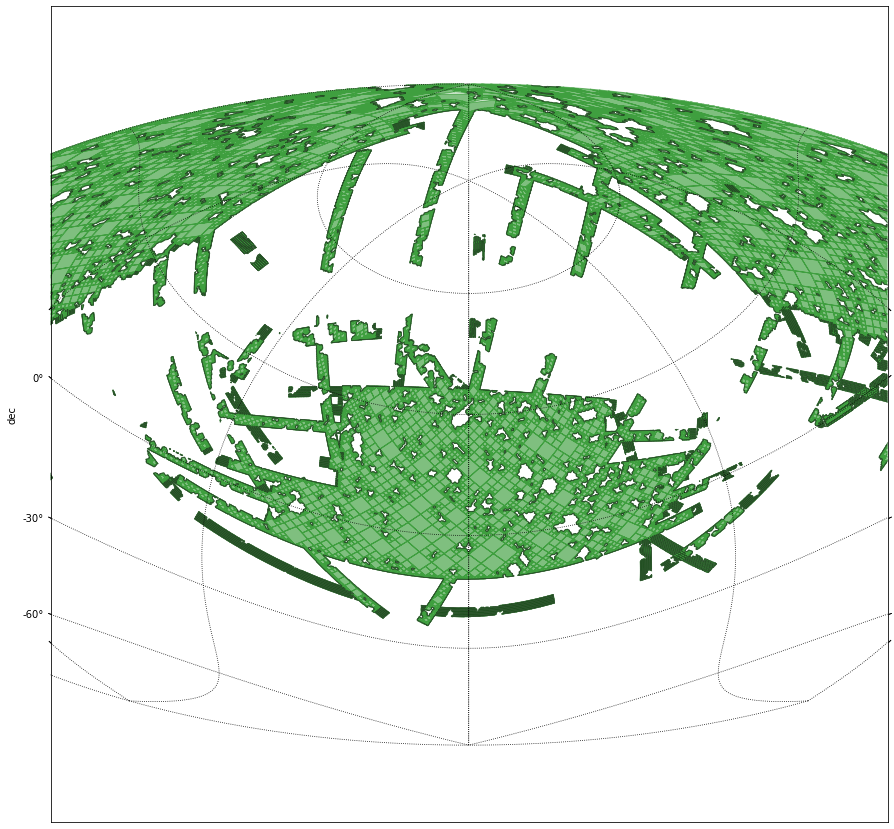

In [6]:
m_intersect = m1.intersection(m2)

import matplotlib.pyplot as plt
fig = plt.figure(111, figsize=(15, 15))

from mocpy import WCS

from astropy.coordinates import Angle
with WCS(fig, 
         fov=200 * u.deg,
         center=SkyCoord(0, 30, unit='deg', frame='icrs'),
         coordsys="icrs",
         rotation=Angle(0, u.degree),
         projection="AIT") as wcs:
    ax = fig.add_subplot(1, 1, 1, projection=wcs)

    %time m_intersect.fill(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="green")
    %time m_intersect.border(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="black")

plt.xlabel('ra')
plt.ylabel('dec')
plt.grid(color="black", linestyle="dotted")

And serialize it to FITS (official serialization):

In [ ]:
hdulist = m_intersect.serialize(format='json')
hdulist

MOC can also be serialized in JSON:
```python
m_intersect.write(format='json')
```

Or write it directly to a FITS/JSON file:
```python
m_intersect.write(path=<filename>, write_to_file=True, format='json'/'fits')
```